<a href="https://colab.research.google.com/github/istiak9999/Malicious-Url-Detection/blob/main/research_DETECTION_OF_MALURL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import numpy as np 
import pandas as pd 


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
benign=pd.read_csv("/content/Benign_list_big_final.csv")

FileNotFoundError: ignored

In [ ]:
defacement["url"]=pd.read_csv("/content/DefacementSitesURLFiltered.csv")

In [ ]:
phishing["url"]=pd.read_csv("/content/phishing_dataset.csv")

In [ ]:
spam["url"]=pd.read_csv("/content/spam_dataset.csv")

In [ ]:
benign.head()

,http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [ ]:
benign['url']=benign

In [ ]:
benign.head()

,http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/,url
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...,http://1337x.to/torrent/1160078/Avengers-age-o...


In [ ]:
benign.drop(columns=benign.columns[0],axis=1,inplace=True)

In [ ]:
benign.head()

,url
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [ ]:
defacement.head()

,url
0,http://www.sinduscongoias.com.br/index.php/ins...
1,http://www.sinduscongoias.com.br/index.php/ins...
2,http://www.sinduscongoias.com.br/index.php/ins...
3,http://www.sinduscongoias.com.br/index.php/ins...
4,http://www.sinduscongoias.com.br/index.php/ins...


In [ ]:
defacement.drop(columns=defacement.columns[0],axis=1,inplace=True)

In [ ]:
phishing.drop(columns=phishing.columns[0],axis=1,inplace=True)

In [ ]:
spam.drop(columns=spam.columns[0],axis=1,inplace=True)

In [ ]:
defacement.head()

,url
0,http://www.sinduscongoias.com.br/index.php/ins...
1,http://www.sinduscongoias.com.br/index.php/ins...
2,http://www.sinduscongoias.com.br/index.php/ins...
3,http://www.sinduscongoias.com.br/index.php/ins...
4,http://www.sinduscongoias.com.br/index.php/ins...


In [ ]:
benign.shape

(35377, 1)

In [ ]:
benign.loc[0:35377,"label"]='benign'

In [ ]:
benign.head()

,url,label
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign


In [ ]:
defacement.shape

(96456, 1)

In [ ]:
defacement.loc[0:96456,"label"]='defacement'

In [ ]:
phishing.shape

(9964, 1)

In [ ]:
phishing.loc[0:9964,"label"]='phishing'

In [ ]:
phishing.head()

,url,label
0,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,phishing
1,http://webmail2.centurytel.net/hwebmail/servic...,phishing
2,http://www.google.com.ng/imgres?imgurl=http://...,phishing
3,http://webmail2.centurytel.net/hwebmail/servic...,phishing
4,http://www.liceonuzzi.it/cmd=_Inf/connectionSt...,phishing


In [ ]:
spam.shape

(11999, 1)

In [ ]:
spam.loc[0:11999,"label"]='spam'

In [ ]:
spam.head()

,url,label
0,http://archive.salisburyjournal.co.uk/2007/3/6...,spam
1,http://appbasic.jettons.co.uk/links/index.html,spam
2,http://archive.yorkpress.co.uk/2003/11/6/25684...,spam
3,http://acard4u.co.uk/product_reviews.php?cPath...,spam
4,http://amazon.co.uk/s/ref=amb_link_22202665_32...,spam


In [ ]:
benign.to_csv("Benign_list_with_label.csv")

In [ ]:
defacement.to_csv("DefacementSites_list_with_label.csv")

In [ ]:
phishing.to_csv("Phishing_list_with_label.csv")

In [ ]:
spam.to_csv("Spam_list_with_label.csv")

In [ ]:
url_data=pd.concat([benign,defacement,phishing,spam]).reset_index(drop=True)

In [ ]:
url_data.head()

,url,label
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign


In [ ]:
url_data.to_csv("URLdata_benign_defacement_phishing_spam_with_label")

Adding result column to sub data sets

In [ ]:
benign.loc[0:35377,"result"]=0

In [ ]:
defacement.loc[0:96456,"result"]=1

In [ ]:
phishing.loc[0:9964,"result"]=2

phishing.head()

,url,label,result
0,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,phishing,2
1,http://webmail2.centurytel.net/hwebmail/servic...,phishing,2
2,http://www.google.com.ng/imgres?imgurl=http://...,phishing,2
3,http://webmail2.centurytel.net/hwebmail/servic...,phishing,2
4,http://www.liceonuzzi.it/cmd=_Inf/connectionSt...,phishing,2


In [ ]:
spam.loc[0:11999,"result"]=3

In [ ]:
spam.tail()

,url,label,result
11994,http://archive.salisburyjournal.co.uk/2001/3/7/,spam,3
11995,http://astore.amazon.co.uk/allezvinsfrenchr/de...,spam,3
11996,http://archive.thisischeshire.co.uk/2000/1/14/...,spam,3
11997,http://applerugs.co.uk/rugs/product_info.php?p...,spam,3
11998,http://allgirltogaparty.co.uk/gallery2/main.ph...,spam,3


In [ ]:
benign.to_csv("Benign_list_with_label&result.csv")

In [ ]:
defacement.to_csv("DefacementSites_list_with_label&result.csv")

In [ ]:
phishing.to_csv("Phishing_list_with_label&result.csv")

In [ ]:
spam.to_csv("Spam_list_with_label&result.csv")

In [ ]:
url_data=pd.concat([benign,defacement,phishing,spam]).reset_index(drop=True)

In [ ]:
url_data.to_csv("URLdata_benign_defacement_phishing_spam_with_label&result")

In [ ]:
url_data.head()

,url,label,result
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0
4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,0


In [ ]:
df=pd.read_csv("/content/URLDATA_benign_defacement_phishing_spam_with_labelresult.csv")


FileNotFoundError: ignored

In [ ]:
df.head()

,Unnamed: 0,url,label,result
0,0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0
1,1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0
2,2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0
3,3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0
4,4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,0


In [ ]:
#Removing the unnamed columns as it is not necesary.
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,url,label,result
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0
4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,0


In [ ]:
df['label'].unique

<bound method Series.unique of 0         benign
1         benign
2         benign
3         benign
4         benign
           ...  
153791      spam
153792      spam
153793      spam
153794      spam
153795      spam
Name: label, Length: 153796, dtype: object>

In [ ]:
df.dropna()

,url,label,result
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0
4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,0
...,...,...,...
153791,http://archive.salisburyjournal.co.uk/2001/3/7/,spam,3
153792,http://astore.amazon.co.uk/allezvinsfrenchr/de...,spam,3
153793,http://archive.thisischeshire.co.uk/2000/1/14/...,spam,3
153794,http://applerugs.co.uk/rugs/product_info.php?p...,spam,3


In [ ]:
df['label'].unique

<bound method Series.unique of 0         benign
1         benign
2         benign
3         benign
4         benign
           ...  
153791      spam
153792      spam
153793      spam
153794      spam
153795      spam
Name: label, Length: 153796, dtype: object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153796 entries, 0 to 153795
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     153796 non-null  object
 1   label   153796 non-null  object
 2   result  153796 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [ ]:
df.isnan().count()

AttributeError: ignored

In [ ]:
df=df.drop(143090)

In [ ]:
df.reset_index()

,index,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,...,1.0,0.0,1.0,0.0,0.0,23.0,43.0,4.0,1.0,1.0
1,1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,...,1.0,0.0,1.0,0.0,0.0,22.0,44.0,4.0,1.0,1.0
2,2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0.0,83.0,8.0,68.0,7.0,11.0,0.0,...,1.0,0.0,1.0,0.0,0.0,18.0,46.0,4.0,1.0,1.0
3,3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,...,1.0,0.0,1.0,0.0,0.0,18.0,48.0,4.0,1.0,1.0
4,4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,...,1.0,0.0,1.0,0.0,0.0,20.0,46.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143085,143085,http://archive.yorkpress.co.uk/2002/10/11/2796...,spam,3.0,53.0,23.0,23.0,4.0,0.0,0.0,...,4.0,0.0,1.0,0.0,0.0,14.0,28.0,4.0,1.0,1.0
143086,143086,http://acard4u.co.uk/product_reviews.php?cPath...,spam,3.0,72.0,13.0,20.0,19.0,0.0,0.0,...,3.0,3.0,1.0,0.0,0.0,5.0,52.0,1.0,1.0,1.0
143087,143087,http://aig.cs.man.ac.uk/people/mashhuda/galler...,spam,3.0,135.0,16.0,33.0,6.0,0.0,0.0,...,5.0,3.0,1.0,0.0,0.0,25.0,89.0,4.0,1.0,1.0
143088,143088,http://acard4u.co.uk/product_reviews.php?cPath...,spam,3.0,74.0,13.0,20.0,19.0,0.0,0.0,...,3.0,3.0,1.0,0.0,0.0,7.0,52.0,1.0,1.0,1.0


In [ ]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [ ]:
df.tail()

,url,label,result
153791,http://archive.salisburyjournal.co.uk/2001/3/7/,spam,3
153792,http://astore.amazon.co.uk/allezvinsfrenchr/de...,spam,3
153793,http://archive.thisischeshire.co.uk/2000/1/14/...,spam,3
153794,http://applerugs.co.uk/rugs/product_info.php?p...,spam,3
153795,http://allgirltogaparty.co.uk/gallery2/main.ph...,spam,3


In [ ]:
df.to_csv("URL_data_final.csv")

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
cols=['url', 'label', 'result', 'url_length', 'hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?', 'count%',
       'count.', 'count=', 'count-http', 'count-https', 'count-www',
       'count-digits', 'count-letters', 'count_dir', 'use_of_ip', 'short_url']
for col in cols:
  print() 


In [ ]:
df['count@'].value_counts()

0    71264
1      175
2       17
Name: count@, dtype: int64

In [ ]:
df['count?'].value_counts()

0     38556
1     32775
2       119
3         2
4         2
12        1
14        1
Name: count?, dtype: int64

In [ ]:
df['count='].value_counts()

0.0     75582
4.0     18582
1.0     12333
5.0     11890
3.0      7343
2.0      6793
6.0      5142
9.0      2326
7.0      1536
8.0      1112
10.0      267
12.0       89
11.0       63
14.0       11
13.0        7
22.0        6
19.0        4
39.0        1
24.0        1
16.0        1
20.0        1
Name: count=, dtype: int64

In [ ]:
df.dtypes

url                 object
label               object
result               int64
url_length           int64
hostname_length      int64
path_length          int64
fd_length            int64
count-               int64
count@               int64
count?               int64
count%               int64
count.               int64
count=               int64
count-http           int64
count-https          int64
count-www            int64
count-digits         int64
count-letters      float64
count_dir          float64
use_of_ip          float64
short_url          float64
dtype: object

In [ ]:
#Removing the unnamed columns as it is not necesary.
df = df.drop('Unnamed: 0',axis=1)
df.head

KeyError: ignored

In [ ]:
su=np.isinf(df).values.sum()

TypeError: ignored

In [ ]:
#Independent Variables
x = df[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = df['result']

KeyError: ignored

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42) 
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

NameError: ignored

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0,83,8,68,7,9,0,0,...,1,0,1,0,0,23,43.0,4.0,1.0,1.0
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0,83,8,68,7,9,0,0,...,1,0,1,0,0,22,44.0,4.0,1.0,1.0
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0,83,8,68,7,11,0,0,...,1,0,1,0,0,18,46.0,4.0,1.0,1.0
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0,83,8,68,7,9,0,0,...,1,0,1,0,0,18,48.0,4.0,1.0,1.0
4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,0,83,8,68,7,9,0,0,...,1,0,1,0,0,20,46.0,4.0,1.0,1.0


In [ ]:
X_train.isna().sum()

hostname_length    0
path_length        0
fd_length          0
count-             0
count@             0
count?             0
count%             0
count.             0
count=             0
count-http         0
count-https        0
count-www          0
count-digits       0
count-letters      0
count_dir          0
use_of_ip          0
dtype: int64

In [ ]:
X_train['count-letters'].dropna()

26706     91.0
51172     60.0
27585    104.0
45589     27.0
9389      63.0
         ...  
37194     27.0
6265      53.0
54886     51.0
860       63.0
15795     77.0
Name: count-letters, Length: 57163, dtype: float64

In [ ]:
X_train['count_dir'].dropna()

26706    8.0
51172    1.0
27585    7.0
45589    3.0
9389     3.0
        ... 
37194    5.0
6265     2.0
54886    3.0
860      3.0
15795    4.0
Name: count_dir, Length: 57163, dtype: float64

In [ ]:
X_train['use_of_ip'].dropna()

NameError: ignored

In [ ]:
np.isinf(df['count-letters']).any()

In [ ]:
np.isinf(df['count-letters']).any()

False

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True).count()


AttributeError: ignored

In [ ]:
X_train.isna().sum()

hostname_length    0
path_length        0
fd_length          0
count-             0
count@             0
count?             0
count%             0
count.             0
count=             0
count-http         0
count-https        0
count-www          0
count-digits       0
count-letters      0
count_dir          0
use_of_ip          0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))


# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_test.columns

In [ ]:
X_train.isna().sum()

hostname_length    0
path_length        0
fd_length          0
count-             0
count@             0
count?             0
count%             0
count.             0
count=             0
count-http         0
count-https        0
count-www          0
count-digits       0
count-letters      0
count_dir          0
use_of_ip          0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
X_train.isna().sum()

NameError: ignored

In [ ]:
from xgboost import XGBClassifier

In [ ]:
my_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train, verbose=False)
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.0555943811587113


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

accuracy = accuracy_score(y_test, predictions)
accuracy 

0.9514641134950031

In [ ]:
**accuracy for XGBclassifier is 95.14**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# creating a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, dtree_predictions)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])


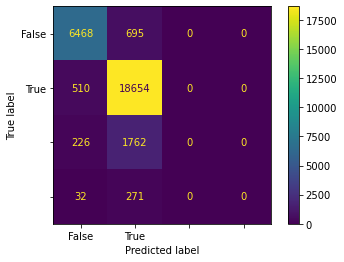

In [ ]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.958382835977357


**accuracy for knn is 95.83**

In [ ]:
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
#cm_knn = confusion_matrix(y_test, knn_predictions)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(X_train, y_train)
predictions_lr = logisticRegr.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions_lr, y_test)))

Mean Absolute Error: 0.13924802571807954


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


next try data scaling and normalization and clean the notebooks

**accuracy for logistic regression is 99.86 highest value so far.**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/URL_data_final.csv")

In [ ]:
df.head()

,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,23.0,43.0,4.0,1.0,1.0
1,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,22.0,44.0,4.0,1.0,1.0
2,benign,0.0,83.0,8.0,68.0,7.0,11.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.0,46.0,4.0,1.0,1.0
3,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.0,48.0,4.0,1.0,1.0
4,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20.0,46.0,4.0,1.0,1.0


In [ ]:
df.tail()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
122317,http://www.abertosp.com/index.php?option=com_c...,defacement,1,83,16,10,9,0,0.0,1.0,...,3.0,4.0,1.0,0.0,1.0,6.0,61.0,1.0,1.0,1.0
122318,http://www.abertosp.com/index.php?option=com_c...,defacement,1,82,16,10,9,0,0.0,1.0,...,3.0,4.0,1.0,0.0,1.0,5.0,61.0,1.0,1.0,1.0
122319,http://www.abertosp.com/index.php?option=com_w...,defacement,1,76,16,10,9,0,0.0,1.0,...,3.0,3.0,1.0,0.0,1.0,3.0,59.0,1.0,1.0,1.0
122320,http://www.abertosp.com/index.php?option=com_c...,defacement,1,92,16,10,9,0,0.0,1.0,...,3.0,5.0,1.0,0.0,1.0,3.0,71.0,1.0,1.0,1.0
122321,http://www.abertosp.com/index.php?option=com_c...,defacement,1,94,16,10,9,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Removing the unnamed columns as it is not necesary.
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,23.0,43.0,4.0,1.0,1.0
1,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,22.0,44.0,4.0,1.0,1.0
2,benign,0.0,83.0,8.0,68.0,7.0,11.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.0,46.0,4.0,1.0,1.0
3,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.0,48.0,4.0,1.0,1.0
4,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20.0,46.0,4.0,1.0,1.0


In [ ]:
#Independent Variables
x = df[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = df['result']

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42) 
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import VotingClassifier

In [ ]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', svm.SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

In [ ]:
# Voting Classifier with hard voting 
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, y_train) 
y_pred = hard_voting.predict(X_test)  

NameError: ignored

In [ ]:
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 

In [ ]:
# repeated evaluation of model averaging ensemble on blobs dataset
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy
from numpy import array
from numpy import argmax
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

# fit model on dataset
def fit_model(X_train, y_train):
	# define model
	model = Sequential()
	model.add(Dense(15, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=200, verbose=0)
	return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = array(yhats)
	# sum across ensemble members
	summed = numpy.sum(yhats, axis=0)
	# argmax across classes
	result = argmax(summed, axis=1)
	return result

# evaluate ensemble model
def evaluate_members(members, testX, testy):
	# make prediction
	yhat = ensemble_predictions(members, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)
# repeated evaluation
n_repeats = 30
n_members = 5
scores = list()
for _ in range(n_repeats):
	# fit all models
	members = [fit_model(trainX, trainy) for _ in range(n_members)]
	# evaluate ensemble
	score = evaluate_members(members, testX, testy)
	print('> %.3f' % score)
	scores.append(score)
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))

> 0.789
> 0.763
> 0.760
> 0.763
> 0.774
> 0.766
> 0.754
> 0.769
> 0.766
> 0.769
> 0.769
> 0.766
> 0.771
> 0.766
> 0.769
> 0.769
> 0.771
> 0.763
> 0.777
> 0.774
> 0.774
> 0.774
> 0.769
> 0.786
> 0.771
> 0.743
> 0.766
> 0.763
> 0.763
> 0.771
Scores Mean: 0.768, Standard Deviation: 0.008


In [ ]:
df.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0,83,8,68,7,9,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,23.0,43.0,4.0,1.0,1.0
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0,83,8,68,7,9,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,22.0,44.0,4.0,1.0,1.0
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0,83,8,68,7,11,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,18.0,46.0,4.0,1.0,1.0
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0,83,8,68,7,9,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,18.0,48.0,4.0,1.0,1.0
4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,0,83,8,68,7,9,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,20.0,46.0,4.0,1.0,1.0


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv("/content/URL_data_fina_virsion 1.csv")

In [ ]:
df.head()

,Unnamed: 0,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,...,1.0,0.0,1.0,0.0,0.0,23.0,43.0,4.0,1.0,1.0
1,1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,...,1.0,0.0,1.0,0.0,0.0,22.0,44.0,4.0,1.0,1.0
2,2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0.0,83.0,8.0,68.0,7.0,11.0,0.0,...,1.0,0.0,1.0,0.0,0.0,18.0,46.0,4.0,1.0,1.0
3,3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,...,1.0,0.0,1.0,0.0,0.0,18.0,48.0,4.0,1.0,1.0
4,4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,...,1.0,0.0,1.0,0.0,0.0,20.0,46.0,4.0,1.0,1.0


In [ ]:
#Removing the unnamed columns as it is not necesary.
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df.dropna()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,23.0,43.0,4.0,1.0,1.0
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,22.0,44.0,4.0,1.0,1.0
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0.0,83.0,8.0,68.0,7.0,11.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,18.0,46.0,4.0,1.0,1.0
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,18.0,48.0,4.0,1.0,1.0
4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,20.0,46.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148750,http://archive.yorkpress.co.uk/2001/8/20/29841...,spam,3.0,52.0,23.0,22.0,4.0,0.0,0.0,0.0,...,4.0,0.0,1.0,0.0,0.0,13.0,28.0,4.0,1.0,1.0
148751,http://archive.salisburyjournal.co.uk/2007/3/1...,spam,3.0,59.0,30.0,22.0,4.0,0.0,0.0,0.0,...,4.0,0.0,1.0,0.0,0.0,13.0,35.0,4.0,1.0,1.0
148752,http://archive.salisburyjournal.co.uk/2000/10/...,spam,3.0,60.0,30.0,23.0,4.0,0.0,0.0,0.0,...,4.0,0.0,1.0,0.0,0.0,14.0,35.0,4.0,1.0,1.0
148753,http://aig.cs.man.ac.uk/people/mashhuda/galler...,spam,3.0,301.0,16.0,33.0,6.0,0.0,0.0,2.0,...,7.0,8.0,1.0,0.0,0.0,59.0,198.0,4.0,1.0,1.0


In [ ]:
df=df.drop(148755)

In [ ]:
df['label'].unique

<bound method Series.unique of 0         benign
1         benign
2         benign
3         benign
4         benign
           ...  
148750      spam
148751      spam
148752      spam
148753      spam
148754      spam
Name: label, Length: 148755, dtype: object>

In [ ]:
df.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,23.0,43.0,4.0,1.0,1.0
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,22.0,44.0,4.0,1.0,1.0
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0.0,83.0,8.0,68.0,7.0,11.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,18.0,46.0,4.0,1.0,1.0
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,18.0,48.0,4.0,1.0,1.0
4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,0.0,83.0,8.0,68.0,7.0,9.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,20.0,46.0,4.0,1.0,1.0


In [ ]:
#Independent Variables
x = df[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = df['result']
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42) 
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (119004, 16)
Shape of X_test:  (29751, 16)
Shape of y_train:  (119004,)
Shape of y_test:  (29751,)


In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_norm, y_train)

# accuracy on X_test
accuracy = knn.score(X_test_norm, y_test)
print(accuracy)

0.9700910273081924


In [ ]:
from xgboost import XGBClassifier
my_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train_norm, y_train, verbose=False)
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report

predictions = my_model.predict(X_test_norm)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

accuracy = accuracy_score(y_test, predictions)
accuracy

Mean Absolute Error: 0.0767555266579974


0.9434330299089727

In [ ]:
#numerical_features
num_cols=['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
X_test_stand.describe()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_stand, y_train)

# accuracy on X_test
accuracy = knn.score(X_test_stand, y_test)
print(accuracy)

0.9759335820644685


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report

logisticRegr = LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200)


In [ ]:
logisticRegr.fit(X_train_stand, y_train)
predictions_lr = logisticRegr.predict(X_test_stand)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions_lr, y_test)))
accuracy = accuracy_score(y_test,predictions_lr)
print(accuracy)

Mean Absolute Error: 0.15824678162078584
0.8810796275755437


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(X_train,X_test)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

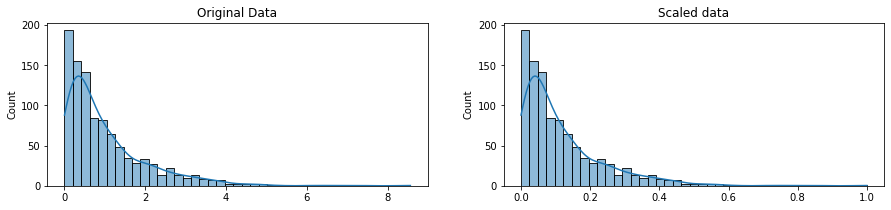

In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

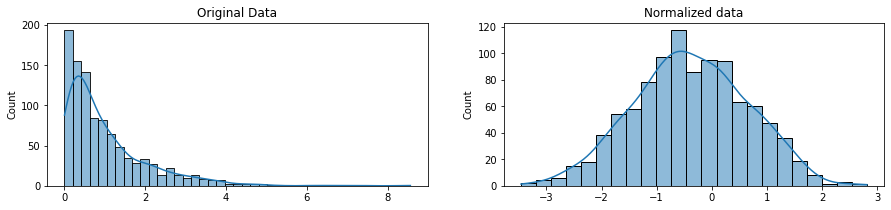

In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(X_train,ytrain)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()


In [ ]:
!apt install -y build-essential swig curl
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

import autosklearn
print(autosklearn.__version__)

In [ ]:
import pandas as pd
import sklearn.metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from autosklearn.classification import AutoSklearnClassifier
from autosklearn.metrics import (accuracy,
                                 f1,
                                 roc_auc,
                                 precision,
                                 average_precision,
                                 recall,
                                 log_loss)

In [ ]:
skf = StratifiedKFold(n_splits=5)
  
clf = AutoSklearnClassifier(time_left_for_this_task=600,
                            max_models_on_disc=5,
                            memory_limit = 10240,
                            resampling_strategy=skf,
                            ensemble_size = 3,
                            metric = average_precision,
                            scoring_functions=[ average_precision, accuracy, f1, precision, recall, log_loss])

In [ ]:
clf.fit(X = X_train_stand, y = y_train)

In [ ]:
df_cv_results = pd.DataFrame(clf.cv_results_).sort_values(by = 'mean_test_score', ascending = False)
df_cv_results

In [ ]:
!pip install flaml

In [ ]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train_stand, y_train, task="classification", time_budget=300)

[flaml.automl: 08-05 17:12:35] {2444} INFO - task = classification
INFO:flaml.automl:task = classification
[flaml.automl: 08-05 17:12:35] {2446} INFO - Data split method: stratified
INFO:flaml.automl:Data split method: stratified
[flaml.automl: 08-05 17:12:35] {2449} INFO - Evaluation method: holdout
INFO:flaml.automl:Evaluation method: holdout
[flaml.automl: 08-05 17:12:36] {2568} INFO - Minimizing error metric: log_loss
INFO:flaml.automl:Minimizing error metric: log_loss
[flaml.automl: 08-05 17:12:36] {2708} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
INFO:flaml.automl:List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 08-05 17:12:36] {3010} INFO - iteration 0, current learner lgbm
INFO:flaml.automl:iteration 0, current learner lgbm
[flaml.automl: 08-05 17:12:36] {3144} INFO - Estimated sufficient time budget=44674s. Estimated necessary time budget=1030s.
I

In [ ]:
print(automl.model)

In [ ]:
predict_aml=automl.predict(X_test_stand)
accuracy=accuracy_score(y_test,predict_aml)
accuracy

0.989075997445464

In [ ]:
automl.add_learner("mylgbm", MyLGBMEstimator)
automl.fit(X_train_stand, y_train, task="classification", metric=custom_metric, estimator_list=["mylgbm"], time_budget=60)

NameError: ignored